<a href="https://colab.research.google.com/github/kay1-cmd/ai101-workspace/blob/main/Python_for_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas Basics for Data Analysis
The name pandas comes from **pan**el **da**ta. If you've worked in excel before, this way of organizing data should look familiar to you.
  
Pandas has two main data structures; a **dataframe** and a **series**. A dataframe is merely a container of series strung together. Thus, each column in a dataframe is a series with its own set of methods. Both dataframes and series have an **index**, which can be either numbers or strings and which cannot contain duplicates, because it is supposed to refer to a unique row or observation in the data.

Pandas is a huge library with a lot of functionality - it's always a good idea to keep the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) near by for reference.
  
It is good practice to keep our data **tidy** - each row would be an observation, each column a variable, and at the intersection of each, a value.
![tidy data](https://r4ds.had.co.nz/images/tidy-1.png)

In [ ]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns


In [ ]:
#Read csv file
df = pd.read_csv('https://raw.githubusercontent.com/Apress/data-analysis-and-visualization-using-python/master/Ch07/Salaries.csv')


In [ ]:
df.tail

<bound method NDFrame.tail of          rank discipline  phd  service     sex  salary
0        Prof          B   56       49    Male  186960
1        Prof          A   12        6    Male   93000
2        Prof          A   23       20    Male  110515
3        Prof          A   40       31    Male  131205
4        Prof          B   20       18    Male  104800
..        ...        ...  ...      ...     ...     ...
73       Prof          B   18       10  Female  105450
74  AssocProf          B   19        6  Female  104542
75       Prof          B   17       17  Female  124312
76       Prof          A   28       14  Female  109954
77       Prof          A   23       15  Female  109646

[78 rows x 6 columns]>

In [ ]:
df.tail(10)


,rank,discipline,phd,service,sex,salary
68,AsstProf,A,4,2,Female,77500
69,Prof,A,28,7,Female,116450
70,AsstProf,A,8,3,Female,78500
71,AssocProf,B,12,9,Female,71065
72,Prof,B,24,15,Female,161101
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954
77,Prof,A,23,15,Female,109646


In [ ]:
#List first 5 records

df.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


In [ ]:
#Check a particular column type
df.shape

(78, 6)

In [ ]:
#Check types for all the columns
df.dtypes



rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

In [ ]:
df2=df.head(50)

df2.mean()

<ipython-input-131-8a7841647ad6>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.mean()


phd            21.52
service        17.60
salary     113789.14
dtype: float64

EDA

In [ ]:
df.mean()

<ipython-input-132-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


phd            19.705128
service        15.051282
salary     108023.782051
dtype: float64

In [ ]:
y=df["salary"]
print(y)

0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64


In [ ]:
#Group data using rank
df_rank = df.groupby(['rank'])


In [ ]:
#Calculate mean value for each numeric column per each group
df_rank.mean()


<ipython-input-135-a9a6cf870272>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rank.mean()


,phd,service,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348


In [ ]:
#Calculate mean salary for each professor rank:
df.groupby('rank')[['salary']].mean()


,salary
rank,
AssocProf,91786.230769
AsstProf,81362.789474
Prof,123624.804348


In [ ]:
df['salary'] > 120000

0      True
1     False
2     False
3      True
4     False
      ...  
73    False
74    False
75     True
76    False
77    False
Name: salary, Length: 78, dtype: bool

In [ ]:
df[df['salary'] == 120000]

,rank,discipline,phd,service,sex,salary
33,Prof,B,18,18,Male,120000


In [ ]:
#Select rows that default to true using conditional statement:

df_sub = df[ df['salary'] > 120000 ]
print(df.shape)
df_sub.shape

(78, 6)


(25, 6)

In [ ]:
#Select only those rows that contain female professors:
df_f = df[ df['sex'] == 'Female' ]
print(df_f.shape)


(39, 6)


In [ ]:
#Select column salary:
df[0:6]


,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400


In [ ]:
#Select columns rank and salary:
df[['rank','salary', "sex"]]

,rank,salary,sex
0,Prof,186960,Male
1,Prof,93000,Male
2,Prof,110515,Male
3,Prof,131205,Male
4,Prof,104800,Male
...,...,...,...
73,Prof,105450,Female
74,AssocProf,104542,Female
75,Prof,124312,Female
76,Prof,109954,Female


In [ ]:
#Select rows by their position:
df[10:21]


,rank,discipline,phd,service,sex,salary
10,Prof,B,39,33,Male,128250
11,Prof,B,23,23,Male,134778
12,AsstProf,B,1,0,Male,88000
13,Prof,B,35,33,Male,162200
14,Prof,B,25,19,Male,153750
15,Prof,B,17,3,Male,150480
16,AsstProf,B,8,3,Male,75044
17,AsstProf,B,4,0,Male,92000
18,Prof,A,19,7,Male,107300
19,Prof,A,29,27,Male,150500


In [ ]:
#Select rows by their labels:
df.loc[10:21,['rank','sex','salary']]


,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
12,AsstProf,Male,88000
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
16,AsstProf,Male,75044
17,AsstProf,Male,92000
18,Prof,Male,107300
19,Prof,Male,150500


In [ ]:
#select a range of rows and/or columns, using their positions:
df_sub.iloc[10:20,[0, 2, 3, 4, 5]]


,rank,phd,service,sex,salary
26,Prof,38,19,Male,148750
27,Prof,45,43,Male,155865
29,Prof,21,20,Male,123683
31,Prof,22,21,Male,155750
35,Prof,28,23,Male,126933
36,Prof,45,45,Male,146856
39,Prof,18,18,Female,129000
40,Prof,39,36,Female,137000
44,Prof,23,19,Female,151768
45,Prof,25,25,Female,140096


In [ ]:
df.iloc[0]  # First row of a data frame
#df.iloc[i]  #(i+1)th row
df.iloc[-1] # Last row




rank            Prof
discipline         A
phd               23
service           15
sex           Female
salary        109646
Name: 77, dtype: object

In [ ]:
df.iloc[:, 0]  # First column
df.iloc[:, -1] # Last column



0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

In [ ]:
df.iloc[0:7]       #First 7 rows

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285


In [ ]:
df.iloc[:, 1:3]    #First 2 columns

,discipline,phd
0,B,56
1,A,12
2,A,23
3,A,40
4,B,20
...,...,...
73,B,18
74,B,19
75,B,17
76,A,28


In [ ]:
df.iloc[1:3, 0:2]  #Second through third rows and first 2 columns

,rank,discipline
1,Prof,A
2,Prof,A


In [ ]:
df.iloc[[0, 5, 15], [1,3]]  #1st and 6th rows and 2nd and 4th columns

,discipline,service
0,B,49
5,A,20
15,B,3


In [ ]:
# Create a new data frame from the original sorted by the column Salary
df_sorted = df.sort_values(by='salary')
df_sorted.head()


,rank,discipline,phd,service,sex,salary
9,Prof,A,51,51,Male,57800
54,AssocProf,A,25,22,Female,62884
66,AsstProf,A,7,6,Female,63100
71,AssocProf,B,12,9,Female,71065
57,AsstProf,A,3,1,Female,72500


In [ ]:
# Sort the data using 2 or more columns:

df_sorted = df.sort_values( by =['service', 'salary'], ascending = [True, False])
df_sorted.head(10)


,rank,discipline,phd,service,sex,salary
52,Prof,A,12,0,Female,105000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
55,AsstProf,A,2,0,Female,72500
57,AsstProf,A,3,1,Female,72500
28,AsstProf,B,7,2,Male,91300
42,AsstProf,B,4,2,Female,80225
68,AsstProf,A,4,2,Female,77500


It's also quite easy to save your dataframe. We save using a new filename because we don't want to overwrite the first one.

In [ ]:
df.to_csv('mydata.csv') #chose a new file name otherwise you will overwrite the original

## Adding new columns to our data

In [ ]:
#Read csv file
df = pd.read_csv("https://cand3workshopbucket.s3.amazonaws.com/geo.csv")


In [ ]:
df.head()

,name,region,oecd,g77,lat,long,income2017
0,Afghanistan,asia,False,True,33.00000,66.00000,low
1,Albania,europe,False,False,41.00000,20.00000,upper_mid
2,Algeria,africa,False,True,28.00000,3.00000,upper_mid
3,Andorra,europe,False,False,42.50779,1.52109,high
4,Angola,africa,False,True,-12.50000,18.50000,lower_mid


Below we can create new columns based on the values in other columns.

In [ ]:
df['imaginary_numbers'] = df['lat'] + df['long']+1
df.head()

,name,region,oecd,g77,lat,long,income2017,imaginary_numbers
0,Afghanistan,asia,False,True,33.00000,66.00000,low,100.00000
1,Albania,europe,False,False,41.00000,20.00000,upper_mid,62.00000
2,Algeria,africa,False,True,28.00000,3.00000,upper_mid,32.00000
3,Andorra,europe,False,False,42.50779,1.52109,high,45.02888
4,Angola,africa,False,True,-12.50000,18.50000,lower_mid,7.00000


In [ ]:
df['southern_oecd'] = (df.lat<0) & (df.oecd==True)
df.head(10)

,name,region,oecd,g77,lat,long,income2017,imaginary_numbers,southern_oecd
0,Afghanistan,asia,False,True,33.00000,66.00000,low,100.00000,False
1,Albania,europe,False,False,41.00000,20.00000,upper_mid,62.00000,False
2,Algeria,africa,False,True,28.00000,3.00000,upper_mid,32.00000,False
3,Andorra,europe,False,False,42.50779,1.52109,high,45.02888,False
4,Angola,africa,False,True,-12.50000,18.50000,lower_mid,7.00000,False
5,Antigua and Barbuda,americas,False,True,17.05000,-61.80000,high,-43.75000,False
6,Argentina,americas,False,True,-34.00000,-64.00000,upper_mid,-97.00000,False
7,Armenia,europe,False,False,40.25000,45.00000,lower_mid,86.25000,False
8,Australia,asia,True,False,-25.00000,135.00000,high,111.00000,True
9,Austria,europe,True,False,47.33333,13.33333,high,61.66666,False


In [ ]:
print(df[0:7], ['southern_oecd'] == True)

                  name    region   oecd    g77       lat      long income2017  \
0          Afghanistan      asia  False   True  33.00000  66.00000        low   
1              Albania    europe  False  False  41.00000  20.00000  upper_mid   
2              Algeria    africa  False   True  28.00000   3.00000  upper_mid   
3              Andorra    europe  False  False  42.50779   1.52109       high   
4               Angola    africa  False   True -12.50000  18.50000  lower_mid   
5  Antigua and Barbuda  americas  False   True  17.05000 -61.80000       high   
6            Argentina  americas  False   True -34.00000 -64.00000  upper_mid   

   imaginary_numbers  southern_oecd  
0          100.00000          False  
1           62.00000          False  
2           32.00000          False  
3           45.02888          False  
4            7.00000          False  
5          -43.75000          False  
6          -97.00000          False   False


In [ ]:
df.head(10)

,name,region,oecd,g77,lat,long,income2017,imaginary_numbers,southern_oecd
0,Afghanistan,asia,False,True,33.00000,66.00000,low,100.00000,False
1,Albania,europe,False,False,41.00000,20.00000,upper_mid,62.00000,False
2,Algeria,africa,False,True,28.00000,3.00000,upper_mid,32.00000,False
3,Andorra,europe,False,False,42.50779,1.52109,high,45.02888,False
4,Angola,africa,False,True,-12.50000,18.50000,lower_mid,7.00000,False
5,Antigua and Barbuda,americas,False,True,17.05000,-61.80000,high,-43.75000,False
6,Argentina,americas,False,True,-34.00000,-64.00000,upper_mid,-97.00000,False
7,Armenia,europe,False,False,40.25000,45.00000,lower_mid,86.25000,False
8,Australia,asia,True,False,-25.00000,135.00000,high,111.00000,True
9,Austria,europe,True,False,47.33333,13.33333,high,61.66666,False


### Renaming

In [ ]:
df.rename(columns={'lat':'latitude'}, inplace=True)

In [ ]:
df.rename(columns={'lat':'latitude'})

,name,region,oecd,g77,latitude,long,income2017,imaginary_numbers,southern_oecd
0,Afghanistan,asia,False,True,33.00000,66.00000,low,100.00000,False
1,Albania,europe,False,False,41.00000,20.00000,upper_mid,62.00000,False
2,Algeria,africa,False,True,28.00000,3.00000,upper_mid,32.00000,False
3,Andorra,europe,False,False,42.50779,1.52109,high,45.02888,False
4,Angola,africa,False,True,-12.50000,18.50000,lower_mid,7.00000,False
...,...,...,...,...,...,...,...,...,...
191,Vietnam,asia,False,True,16.16667,107.83333,lower_mid,125.00000,False
192,Yemen,asia,False,True,15.50000,47.50000,lower_mid,64.00000,False
193,Zambia,africa,False,True,-14.33333,28.50000,lower_mid,15.16667,False
194,Zimbabwe,africa,False,True,-19.00000,29.75000,low,11.75000,False


In [ ]:
df.head()

,name,region,oecd,g77,latitude,long,income2017,imaginary_numbers,southern_oecd
0,Afghanistan,asia,False,True,33.00000,66.00000,low,100.00000,False
1,Albania,europe,False,False,41.00000,20.00000,upper_mid,62.00000,False
2,Algeria,africa,False,True,28.00000,3.00000,upper_mid,32.00000,False
3,Andorra,europe,False,False,42.50779,1.52109,high,45.02888,False
4,Angola,africa,False,True,-12.50000,18.50000,lower_mid,7.00000,False


✮ The `inplace` parameter will show up often in pandas method definitions. It is used when pandas will by default return a *new* dataframe that has been created from your operation. You can use `inplace=True` to assign that new dataframe back to the original variable.

## Joining and Merging
There are [several ways](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) to join together data in pandas. Merging is distinct from joining is distinct from concatenating. Merging is "column-on-column" and joinging is "index-on-index," while concatenation is simply joining dataframes end-to-end.   

### "Key" concept
Remember that a dataframe has an index, which is a sequence of values. Each observation in the data has value in the index. When joining and merging, the index often serves as the **key** used to join two dataframes together.

### Joining
Let's start by looking at basic **join** using an example from the pandas documentation.

In [ ]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                      'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                       'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [ ]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [ ]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [ ]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


Notice that there is no `K3` observation in the resulting dataframe, nor is there a `C` or `D` value  for `K1`. This is because the default `join` is a left one. Panda's join allows for four types of joins, inner, outter, left, and right. In the case of a left join, all observations in the left table are kept. Information regarding them from the right table is kept, while observations unique to the right table are discarded. This classic illustration should provide some intuition on the four types of joins.  
![joins](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)  
**➤ Try changing the `how` parameter below to see different joins.**

In [ ]:
left.join(right, how = 'right')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


### Merging
The `merge()` method in pandas brings a lot more functionality to the basic join. One of the perks of using this method is a finer control over which columns will serve as the keys - or, using the intersection of columns (the columns that both dataframes share). Let's reuse our `left` and `right` dataframes with a slight modification.

In [ ]:
left['E'] = ['E0', 'E1', 'E2']
right['E'] = ['E0', 'E1', 'E2']

left.merge(right)

,A,B,E,C,D
0,A0,B0,E0,C0,D0
1,A1,B1,E1,C2,D2
2,A2,B2,E2,C3,D3


Merge performed a left join again, but instead of using the index as a key, it defaulted to using the column that they had in common, `E`.


### Appending
Finally, we can also append a single row (rather than an entire dataframe) by creating a Series and using the parameter `ignore_index=True.`

In [ ]:
my_coords = (51.88999644,1.476164762)
my_country = pd.Series({'name':'Sealand','region':'europe','oecd':False,'g77':False,
                        'latitude':my_coords[0], 'long':my_coords[1],'income2017':'low',
                        'imaginary_numbers':my_coords[0]+my_coords[1],'southern_oecd':False})
my_country

name                   Sealand
region                  europe
oecd                     False
g77                      False
latitude             51.889996
long                  1.476165
income2017                 low
imaginary_numbers    53.366161
southern_oecd            False
dtype: object

In [ ]:
df = df.append(my_country,ignore_index=True) # we need this ignore index in order to insert our country into
                                             # the index range of the existing dataframe
df.tail()

<ipython-input-171-9e2b633bf531>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(my_country,ignore_index=True) # we need this ignore index in order to insert our country into


,name,region,oecd,g77,latitude,long,income2017,imaginary_numbers,southern_oecd
192,Yemen,asia,False,True,15.500000,47.500000,lower_mid,64.000000,False
193,Zambia,africa,False,True,-14.333330,28.500000,lower_mid,15.166670,False
194,Zimbabwe,africa,False,True,-19.000000,29.750000,low,11.750000,False
195,South Sudan,africa,False,True,7.500000,30.000000,low,38.500000,False
196,Sealand,europe,False,False,51.889996,1.476165,low,53.366161,False


## Plotting
`Matplotlib` is a legacy package for plotting, and is the package which pandas' plotting functionality (as well as most other python libraries) is built upon.

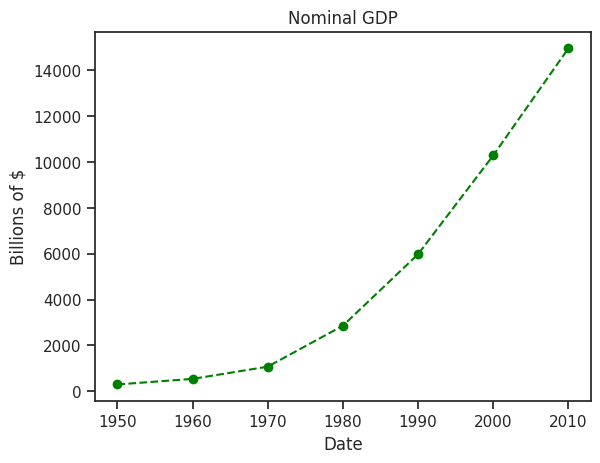

In [ ]:
from matplotlib import pyplot as plt

years=[1950,1960,1970,1980,1990,2000,2010]
gdp=[300.2,543.3,1075.9,2862.5,5979.6,10289.7,14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years,gdp,color='green',marker='o',linestyle='dashed')

# add a title

plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")

plt.xlabel('Date')

plt.show() # code to print out final chart

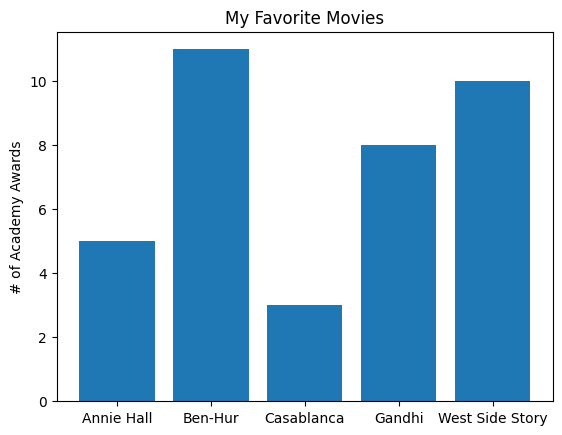

In [ ]:
# Bar chart example #1

movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]


# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(movies,num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

# label x-axis with movie names at bar centers
plt.show()

Text(0, 0.5, 'Count')

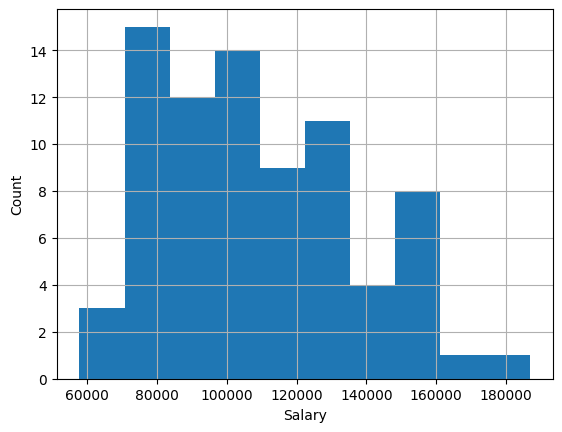

In [ ]:
# Histograms
# Create a histogram using pandas dataframe column.
df = pd.read_csv("https://raw.githubusercontent.com/Apress/data-analysis-and-visualization-using-python/master/Ch07/Salaries.csv")

df['salary'].hist()
plt.xlabel('Salary')
plt.ylabel('Count')

Text(0, 0.5, 'Years since PhD')

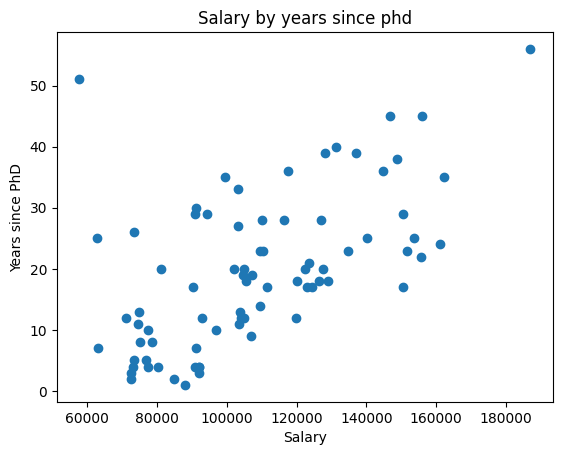

In [ ]:
# Scatterplots

plt.scatter(df['salary'], df['phd'])
plt.title("Salary by years since phd")
plt.xlabel("Salary")
plt.ylabel("Years since PhD")

In [ ]:
# You can extend the visual power of matplot lib quickly by using seaborn tutorials

#https://seaborn.pydata.org/tutorial.html

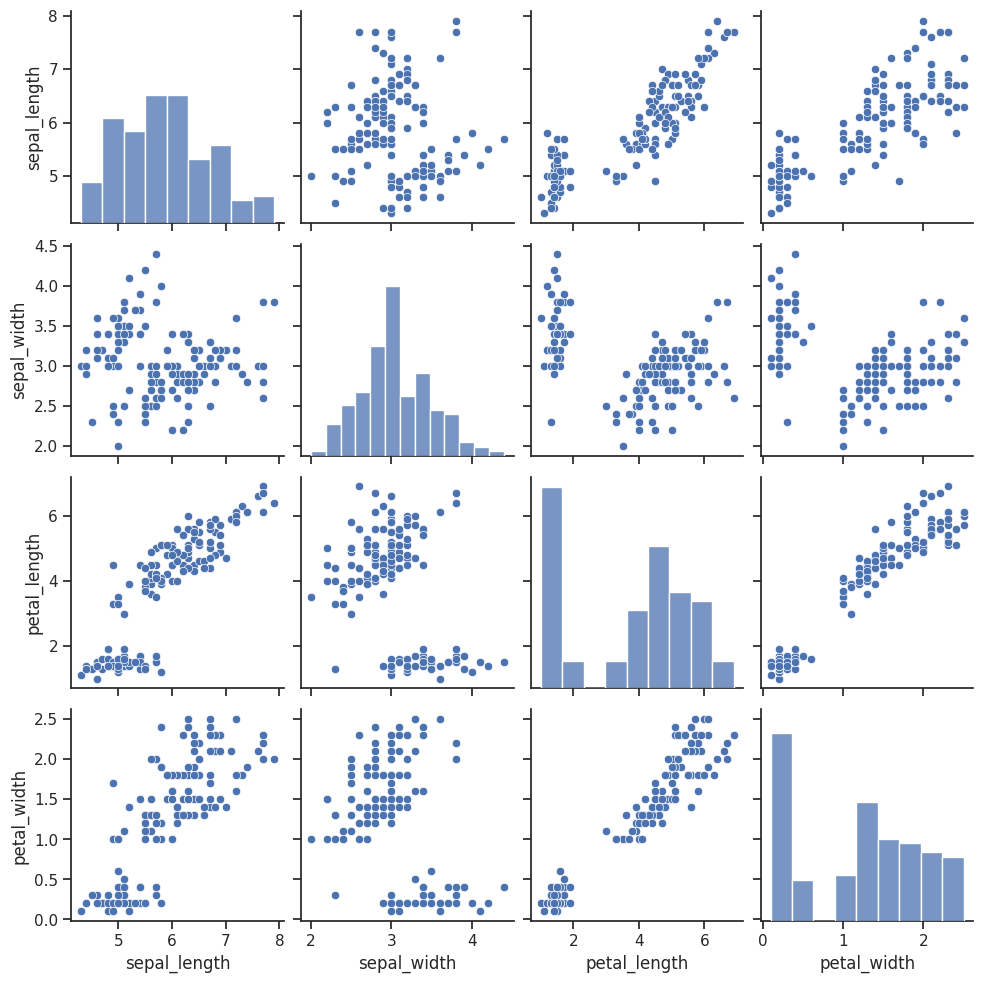

In [ ]:
# pairplots are a good example:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

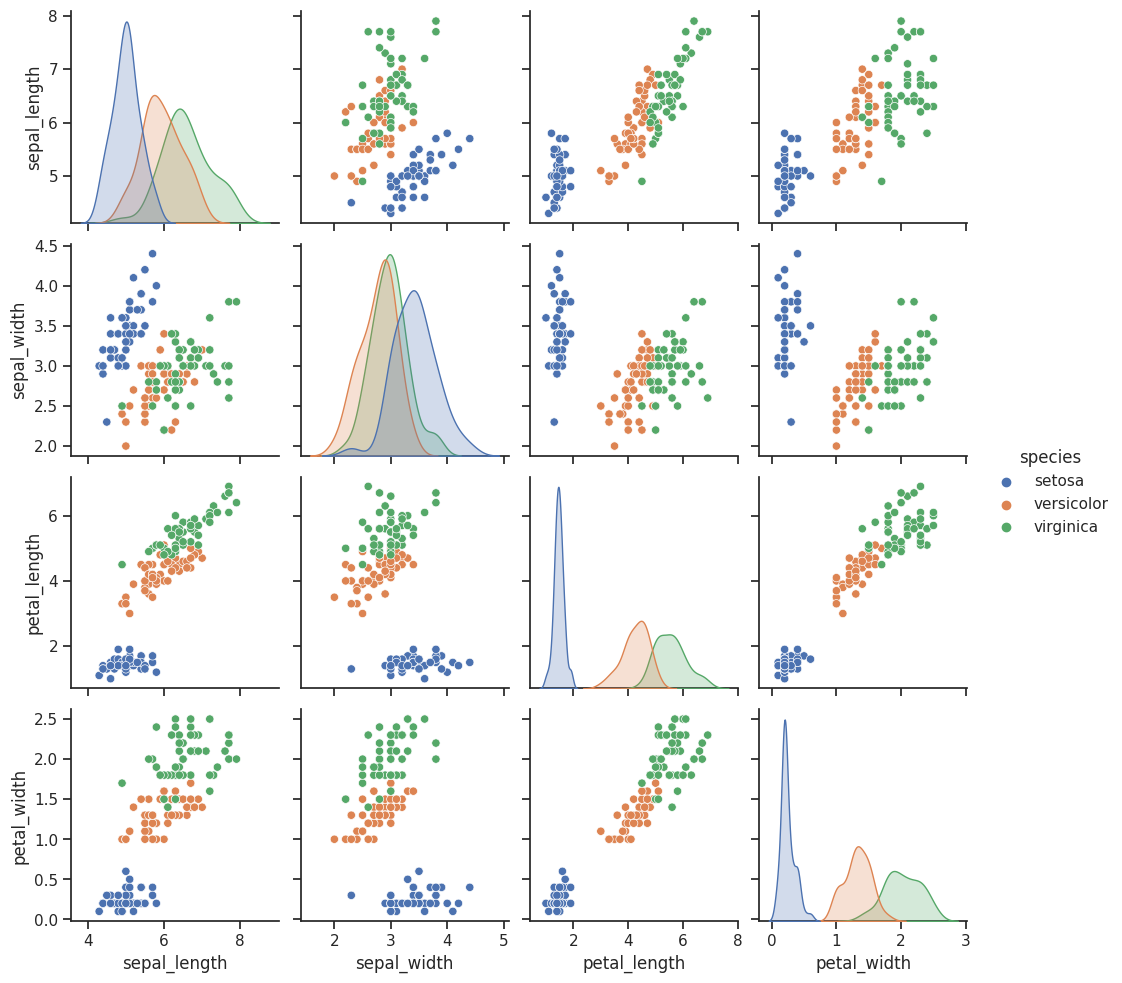

In [ ]:
# some more pairplot extensions:  https://seaborn.pydata.org/generated/seaborn.pairplot.html

g = sns.pairplot(iris, hue="species")

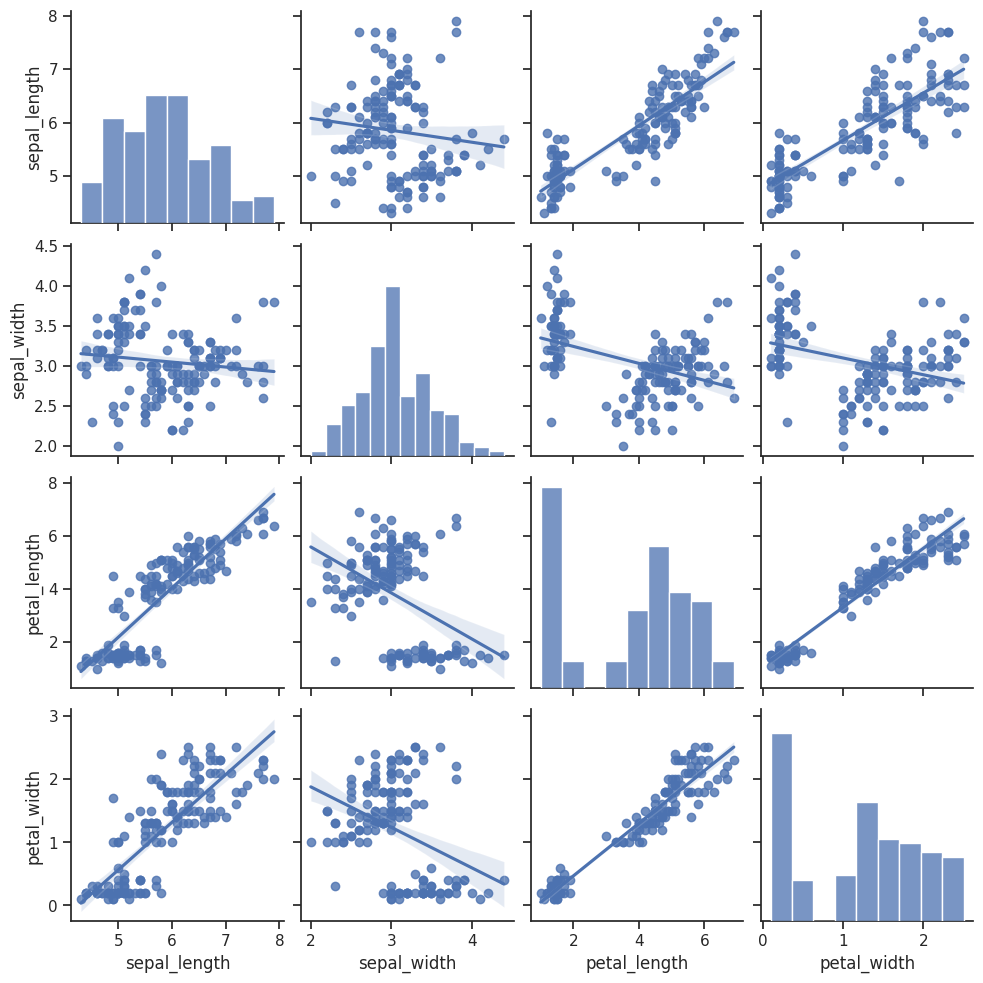

In [ ]:
# add regression lines
g = sns.pairplot(iris, kind="reg")